In [3]:
print('STOCK PREDICTION USING RNN LSTM')
import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.layers import  Dropout
from keras.models import model_from_json
from keras.models import load_model
from keras import regularizers

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)

%matplotlib inline

STOCK PREDICTION USING RNN LSTM


Using TensorFlow backend.


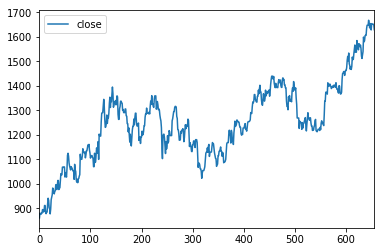

<Figure size 432x288 with 0 Axes>

In [4]:
data_csv = pd.read_csv('final_dataset3.csv')

data_csv[['close']].plot()
plt.show()
plt.clf()

In [5]:
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(data_csv)-1))

# 80% of data will be of training
train_end = int(data_to_use*0.8)

total_data = len(data_csv)
print("total_data:", total_data)

('total_data:', 657)


In [6]:
start = total_data - data_to_use

# Currently doing prediction only for 1 step ahead
steps_to_predict = 1

#close, compund, neg, neu, pos, open, high, low, volume
# Order -> 8,1,2,3,4,5,6,7,9
yt = data_csv.iloc[start:total_data,4] #close
#yt1 = data_csv.iloc[start:total_data,9] #compund
#yt2 = data_csv.iloc[start:total_data,6] #neg
#yt3 = data_csv.iloc[start:total_data,7] #neu
#yt4 = data_csv.iloc[start:total_data,8] #pos
yt5 = data_csv.iloc[start:total_data,1] #open
yt6 = data_csv.iloc[start:total_data,2] #high
yt7 = data_csv.iloc[start:total_data,3] #low
vt = data_csv.iloc[start:total_data,5] #volume

print("yt head (close) :")
print(yt.head())

yt head (close) :
1    879.80
2    876.95
3    874.85
4    879.55
5    879.55
Name: close, dtype: float64


In [7]:
#shift next day close and next day compund 
yt_ = yt.shift(-1) #shifted close
#yt1_ = yt1.shift(-1) #shifted compund

#taking only: close, next_close, compund, next_compund, volume, open, high, low
data = pd.concat([yt, yt_, vt, yt5, yt6, yt7], axis=1)
data.columns = ['yt', 'yt_','vt', 'yt5', 'yt6', 'yt7']

data = data.dropna()
     
print(data[:10])

        yt     yt_       vt     yt5     yt6    yt7
1   879.80  876.95  2862754  873.00  881.95  865.0
2   876.95  874.85  1625072  877.05  882.15  870.0
3   874.85  879.55  1475886  877.10  886.90  870.3
4   879.55  879.55  4983550  872.00  882.50  862.1
5   879.55  894.10  4983550  872.00  882.50  862.1
6   894.10  894.10  5096356  885.00  897.00  883.5
7   894.10  884.35  5096356  885.00  897.00  883.5
8   884.35  887.40  2581562  887.30  892.95  880.0
9   887.40  910.95  1794252  881.15  893.40  877.0
10  910.95  910.95  3080739  897.90  914.75  897.0


In [8]:
# target variable - closed price
# after shifting
y = data['yt_'] #next_close

# close, compund, next_compund, volume, open, high, low   
cols = ['yt', 'vt', 'yt5', 'yt6', 'yt7']
x = data[cols]

In [9]:
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

In [10]:
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),]    
y_train = y[0 : train_end] 
y_test = y[train_end+1 : len(y)]  

X_train = X_train.reshape (X_train.shape + (1,)) 
X_test = X_test.reshape(X_test.shape + (1,))

In [11]:
batch_size = 32
nb_epoch = 200
neurons = 35
dropout = 0.1

seed = 2016
np.random.seed(seed)

model = Sequential ()
model.add(LSTM(neurons, return_sequences=True, activation='tanh', inner_activation='hard_sigmoid', input_shape=(len(cols), 1)))
model.add(Dropout(dropout))
model.add(LSTM(neurons, return_sequences=True,  activation='tanh'))
model.add(Dropout(dropout))
model.add(LSTM(neurons, activation='tanh'))
model.add(Dropout(dropout))

model.add(Dense(activity_regularizer=regularizers.l1(0.00001), output_dim=1, activation='linear'))
model.add(Activation('tanh'))

print(model.summary())

model.compile(loss='mean_squared_error' , optimizer='RMSprop')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch, verbose=1, validation_split=0.2)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(35, return_sequences=True, activation="tanh", input_shape=(5, 1), recurrent_activation="hard_sigmoid")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activity_regularizer=<keras.reg..., activation="linear")`
/home/sugar/.local/lib/python2.7/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 35)             5180      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 35)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 35)             9940      
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 35)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 35)                9940      
_________________________________________________________________
dropout_3 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 36        
__________

419/419 [==============================] - 0s - loss: 0.0052 - val_loss: 0.0056
Epoch 74/200
419/419 [==============================] - 0s - loss: 0.0053 - val_loss: 0.0069
Epoch 75/200
419/419 [==============================] - 0s - loss: 0.0054 - val_loss: 0.0051
Epoch 76/200
419/419 [==============================] - 0s - loss: 0.0055 - val_loss: 0.0115
Epoch 77/200
419/419 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0098
Epoch 78/200
419/419 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0081
Epoch 79/200
419/419 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0069
Epoch 80/200
419/419 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0076
Epoch 81/200
419/419 [==============================] - 0s - loss: 0.0053 - val_loss: 0.0085
Epoch 82/200
419/419 [==============================] - 0s - loss: 0.0051 - val_loss: 0.0082
Epoch 83/200
419/419 [==============================] - 0s - loss: 0.0052 - val_los

419/419 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0044
Epoch 161/200
419/419 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0052
Epoch 162/200
419/419 [==============================] - 0s - loss: 0.0051 - val_loss: 0.0050
Epoch 163/200
419/419 [==============================] - 0s - loss: 0.0053 - val_loss: 0.0061
Epoch 164/200
419/419 [==============================] - 0s - loss: 0.0050 - val_loss: 0.0037
Epoch 165/200
419/419 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0052
Epoch 166/200
419/419 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0083
Epoch 167/200
419/419 [==============================] - 0s - loss: 0.0049 - val_loss: 0.0046
Epoch 168/200
419/419 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0036
Epoch 169/200
419/419 [==============================] - 0s - loss: 0.0051 - val_loss: 0.0050
Epoch 170/200
419/419 [==============================] - 0s - loss: 0.0052

In [12]:
import math
score_train = model.evaluate(X_train, y_train, batch_size =1)
score_test = model.evaluate(X_test, y_test, batch_size =1)
rmse_train = math. sqrt(score_train)
rmse_test = math.sqrt(score_test)
print("in train MSE = ", round( score_train ,4)) 
print("in test MSE = ", score_test )
print("RMSE in train = ", rmse_train)
print("RMSE in test = ", rmse_test)

125/130 [===========================>..] - ETA: 0s('in train MSE = ', 0.0048)
('in test MSE = ', 0.015867038100507741)
('RMSE in train = ', 0.06939867575211342)
('RMSE in test = ', 0.12596443188657558)


In [12]:
model_json = model.to_json()
with open("model_rms100e_new.json", "w") as json_file:
    json_file.write(model_json)
 #serialize weights to HDF5
model.save_weights("model_rms100e_new.h5")
print("Saved model to disk")

Saved model to disk


Inputs: (None, 5, 1)
Outputs: (None, 1)
Actual input: (130, 5, 1)
Actual output: (130, 1)
prediction data:
[ 1527.83349609]
actual data
[[  1.28985000e+03   2.70420800e+06   1.27050000e+03   1.29500000e+03
    1.27050000e+03]
 [  1.26825000e+03   2.33339800e+06   1.28700000e+03   1.28970000e+03
    1.26000000e+03]
 [  1.26655000e+03   1.62888500e+06   1.27900000e+03   1.27900000e+03
    1.25700000e+03]
 [  1.25920000e+03   1.73169100e+06   1.26200000e+03   1.27740000e+03
    1.25525000e+03]
 [  1.26915000e+03   2.77532200e+06   1.26200000e+03   1.27800000e+03
    1.26200000e+03]
 [  1.26915000e+03   2.77532200e+06   1.26200000e+03   1.27800000e+03
    1.26200000e+03]
 [  1.24790000e+03   1.27950800e+06   1.26300000e+03   1.26390000e+03
    1.24265000e+03]
 [  1.23555000e+03   1.93565200e+06   1.24590000e+03   1.25590000e+03
    1.22780000e+03]
 [  1.23560000e+03   3.21798000e+06   1.24200000e+03   1.25695000e+03
    1.23025000e+03]
 [  1.21740000e+03   2.23870300e+06   1.23480000e+03  

/home/sugar/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


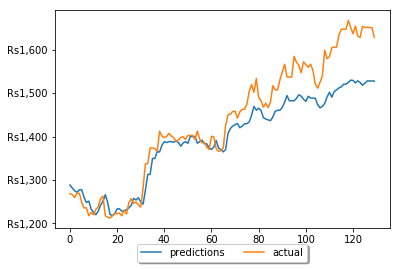

<function matplotlib.pyplot.clf>

In [13]:
pred = model.predict(X_test) 
pred = scaler_y.inverse_transform(np.array(pred).reshape((len(pred), 1)))

prediction_data = pred[-1]     

print ("Inputs: {}".format(model.input_shape))
print ("Outputs: {}".format(model.output_shape))
print ("Actual input: {}".format(X_test.shape))
print ("Actual output: {}".format(y_test.shape))

print ("prediction data:")
print (prediction_data)

print ("actual data")
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))
print (X_test)

#########################################################################
'''Plotting'''
plt.plot(pred, label="predictions")

y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len( y_test), 1)))
plt.plot([row[0] for row in y_test], label="actual")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)


fmt = 'Rs{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

ax = plt.axes()
ax.yaxis.set_major_formatter(tick)
plt.show()
plt.clf

#1632